170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - accuracy: 0.2978 - loss: 1.8989 - val_accuracy: 0.4882 - val_loss: 1.4338
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 86ms/step - accuracy: 0.5142 - loss: 1.3588 - val_accuracy: 0.5344 - val_loss: 1.3039
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.5783 - loss: 1.1880 - val_accuracy: 0.5863 - val_loss: 1.1669
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.6193 - loss: 1.0824 - val_accuracy: 0.6314 - val_loss: 1.0589
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 89ms/step - accuracy: 0.6539 - loss: 0.9835 - val_accuracy: 0.6478 - val_loss: 0.9946
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6864 - loss: 0.8967 - val_accuracy: 0.6740 - val_loss: 0.9407
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6981 - loss: 0.8661 - val_accuracy: 0.6765 - val_loss: 0.9449
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━

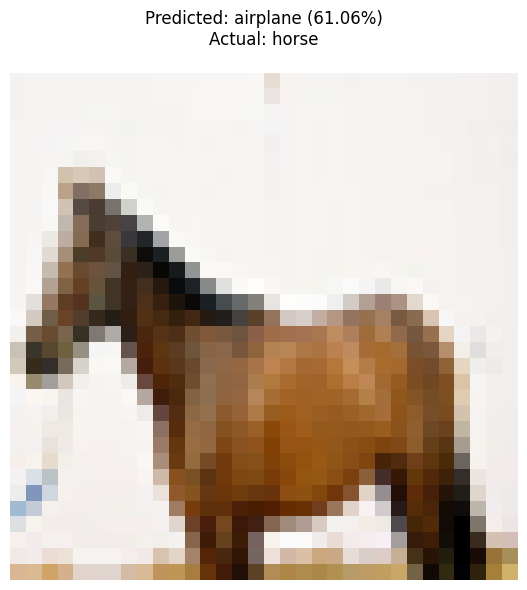


Showing multiple sample predictions:


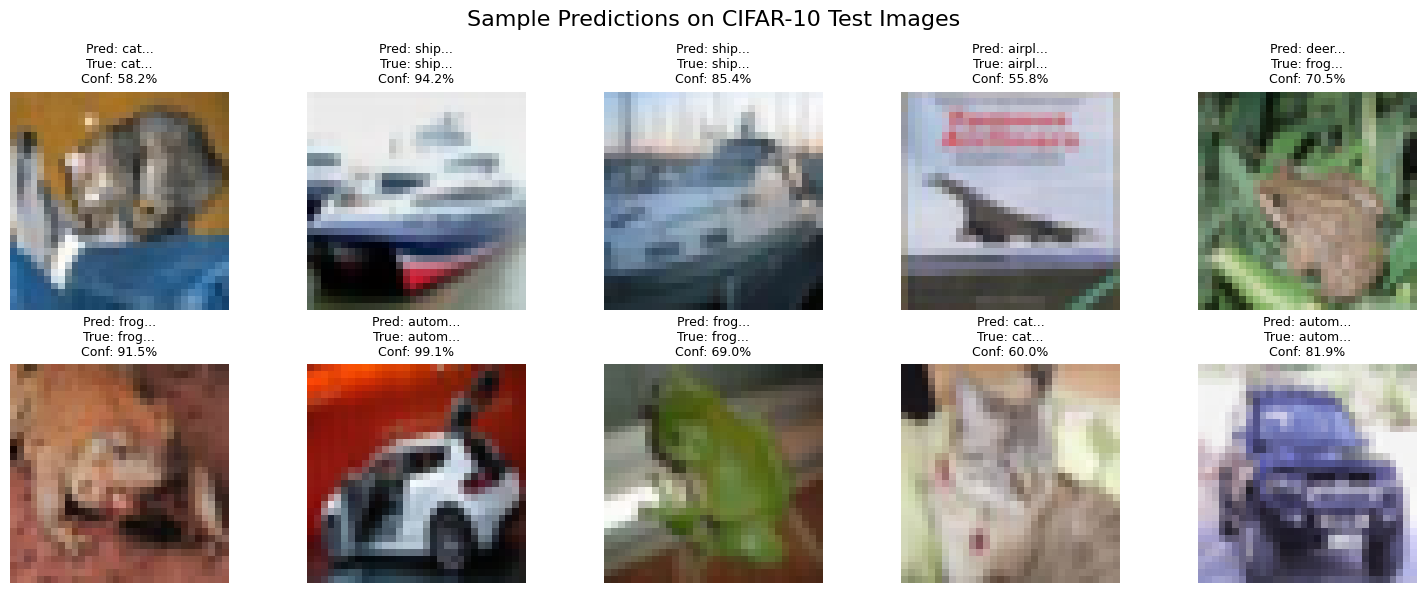

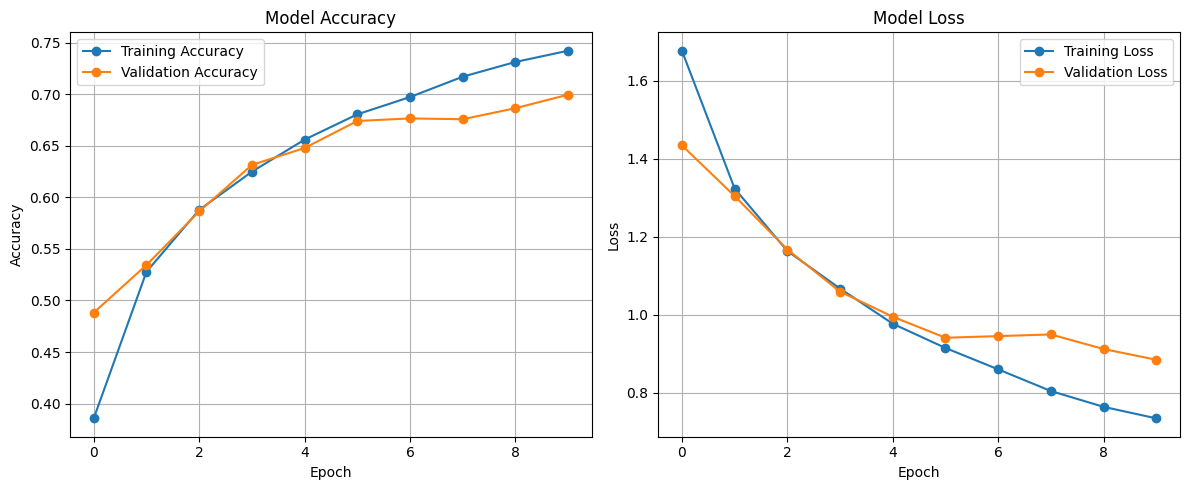

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Get user input and make prediction
try:
    index = int(input("Enter an index (0 to 9999) for test image: "))
    if index < 0 or index >= len(x_test):
        print("Invalid index. Using index 0 by default.")
        index = 0
except ValueError:
    print("Invalid input. Using index 0 by default.")
    index = 0

test_image = x_test[index]
true_label = np.argmax(y_test[index])
prediction = model.predict(np.expand_dims(test_image, axis=0), verbose=0)
predicted_label = np.argmax(prediction)
confidence = np.max(prediction) * 100

# Display prediction
plt.figure(figsize=(6, 6))
plt.imshow(test_image)  # No need to resize for display
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_label]} ({confidence:.2f}%)\nActual: {class_names[true_label]}",
          fontsize=12, pad=20)
plt.tight_layout()
plt.show()

# Additional: Show multiple sample predictions
print("\nShowing multiple sample predictions:")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample Predictions on CIFAR-10 Test Images', fontsize=16)

for i in range(10):
    row, col = i // 5, i % 5
    test_img = x_test[i]
    true_lbl = np.argmax(y_test[i])
    pred = model.predict(np.expand_dims(test_img, axis=0), verbose=0)
    pred_lbl = np.argmax(pred)
    conf = np.max(pred) * 100

    axes[row, col].imshow(test_img)
    axes[row, col].set_title(f"Pred: {class_names[pred_lbl][:5]}...\nTrue: {class_names[true_lbl][:5]}...\nConf: {conf:.1f}%",
                           fontsize=9)
    axes[row, col].axis('off')

    # Color code based on correctness
    if pred_lbl == true_lbl:
        axes[row, col].patch.set_edgecolor('green')
    else:
        axes[row, col].patch.set_edgecolor('red')
    axes[row, col].patch.set_linewidth(2)

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()